# Testing the Head

**Warning:** Before running this notebook, first make sure you understand the command you run and make sure that the robot can freely move.

**Note:** Also stop all other running Python script or notebook connected to the robot as only one connection can run at the same time.

In [1]:
%matplotlib notebook

import time
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt

## Connect to the head

In [2]:
from reachy import Reachy, parts

In [3]:
reachy = Reachy(
    #head=parts.Head(io='/dev/ttyUSB*'),
    head=parts.Head(io='ws'),
)

You can now connect your robot in Unity.

## Move the neck

Check that all 3 disks are present and ok.

In [4]:
for d in reachy.head.neck.disks:
    print(d, d.temperature)

<Orbita "head.disk_top" pos="-60> 37.2
<Orbita "head.disk_middle" pos="-60> 37.2
<Orbita "head.disk_bottom" pos="-60> 37.2


Turn compliant/stiff and check that the head is free or fixed.

In [5]:
reachy.head.compliant = True

In [6]:
reachy.head.compliant = False

Go to the base position.

In [7]:
reachy.head.compliant = False
reachy.head.look_at(1, 0, 0, duration=1, wait=True)

Play some random moves.

<IPython.core.display.Javascript object>


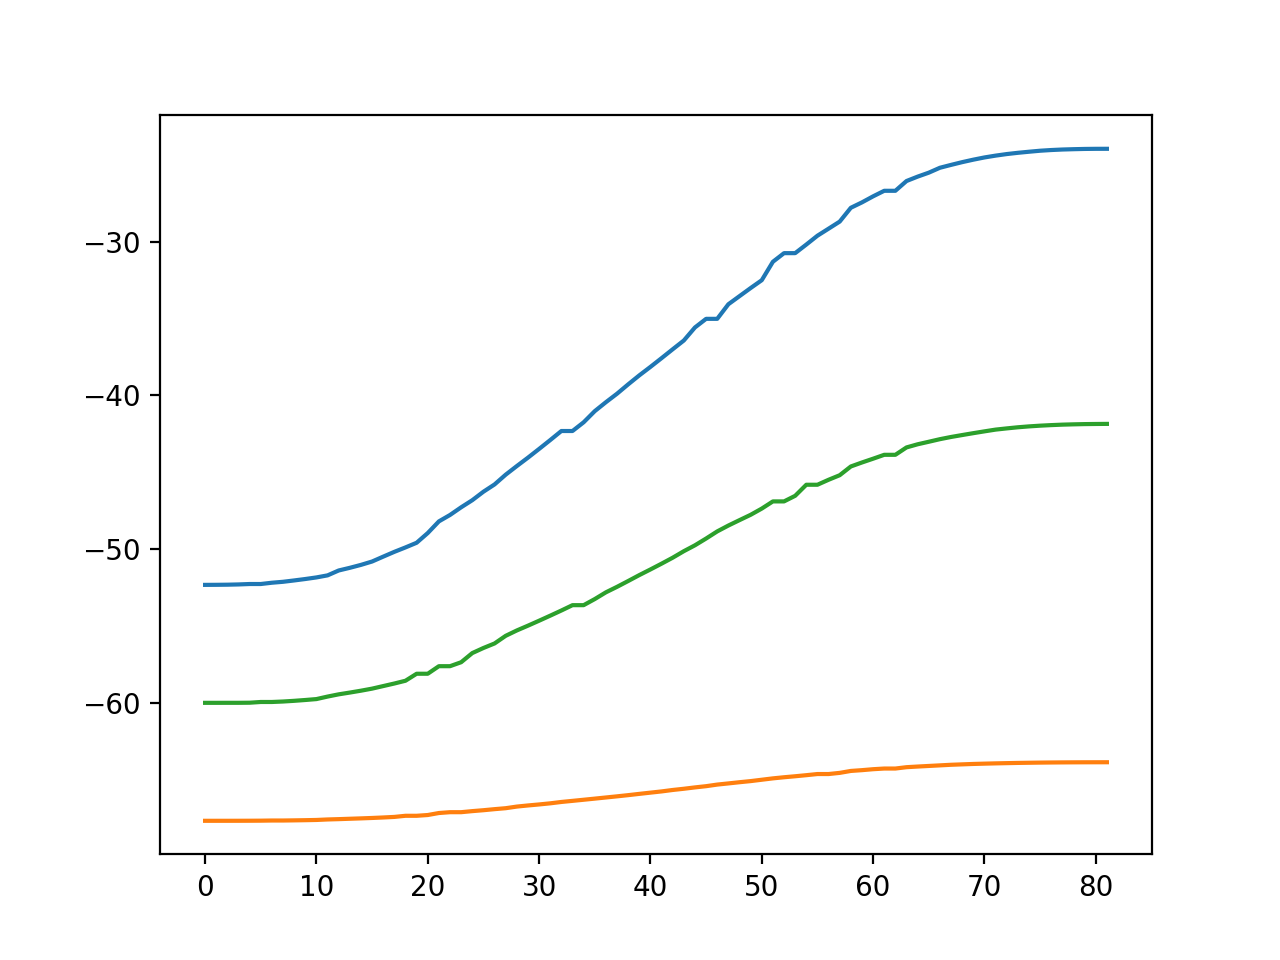

In [8]:
x = 0.5
y = (2 * np.random.rand() - 1) * 0.25
z = (2 * np.random.rand() - 1) * 0.25

duration = 1

reachy.head.look_at(x, y, z, duration=duration, wait=False)

real = []

t0 = time.time()
while time.time() - t0 < duration:
    real.append([d.rot_position for d in reachy.head.neck.disks])
    time.sleep(0.01)
    
plt.figure()
plt.plot(real)

## Move the antennas

Check that we have both antennas.

In [9]:
reachy.head.motors

[<DxlMotor "head.left_antenna" pos="0.0" mode="stiff">,
 <DxlMotor "head.right_antenna" pos="0.0" mode="stiff">]

Turn them stiff.

In [10]:
for m in reachy.head.motors:
    m.compliant = False

Make them go to 0

In [11]:
for m in reachy.head.motors:
    m.goal_position = 0

Make them go to 45

In [12]:
for m in reachy.head.motors:
    m.goal_position = 45

(check that they both moved)

Make them go to 0 again

In [13]:
for m in reachy.head.motors:
    m.goal_position = 0

Make them follow a sinus for a few seconds.

In [14]:
t = np.linspace(0, 10, 1000)
pos = 30 * np.sin(2 * np.pi * 0.5 * t)

for p in pos:
    for m in reachy.head.motors:
        m.goal_position = p
    time.sleep(0.01)

## Access the cameras

*Note: the cameras don't seem to be working in the simulator for reachy v1.2.3. - PC*

Check the right camera.

In [15]:
success, img = reachy.head.right_camera.read()

if success:
    plt.figure()
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

AttributeError: 'Head' object has no attribute 'right_camera'

Check the left camera.

In [16]:
success, img = reachy.head.left_camera.read()

if success:
    plt.figure()
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

AttributeError: 'Head' object has no attribute 'left_camera'